# **Laboratorio 1: Uso de Numpy y BOCOP**
**MA4703 Control Óptimo: Teoría y Laboratorio.**

**Profesor:** Héctor Ramírez Cabrera.

**Auxiliares:** Matías Vera y Adrián Arellano.

*El presente archivo presenta únicamente las partes del laboratorio que fueron realizadas en lenguaje Python, el resto quedan anexadas en el informe respectivo. Se deja una celda con la instalación de las dependencias necesarias en caso de necesitarlas, no arruina instalaciones o versiones previas de librerías ya existentes.*

In [ ]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy
    import sympy
except:
    !pip install numpy matplotlib scipy sympy
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy
    import sympy

## **Ejercicio 1**



### **Parte a)**

In [ ]:
sympy.__version__

'1.12'

In [ ]:
from sympy import symbols, Eq, Function, log, dsolve, lambdify # Funciones de sympy

In [ ]:
x, y = symbols('x y', cls=Function) # Funciones incógnitas

t = symbols('t') # Variable tiempo

# Ecuaciones a resolver
eqs = [Eq(x(t).diff(t)-3*x(t)+x(t)*y(t),0), Eq(y(t).diff(t)-y(t)-log(y(t)),0)]

# Resolución
eq1, eq2 = dsolve(eqs, [y(t), x(t)])

In [ ]:
eq1

Eq(x(t), exp(C1 + exp(C2 + t) - 3))

In [ ]:
eq2

Eq(y(t), C1 - log(exp(C1 + exp(C2 + t) - 3)))

In [ ]:
# Ecuaciones con condiciones iniciales
eq1_ini, eq2_ini = dsolve(eqs, [x(t), y(t)], ics={x(0): -5, y(0): 1})

In [ ]:
eq1_ini

Eq(x(t), -5*exp(2*exp(t) - 2))

In [ ]:
eq2_ini

Eq(y(t), -log(-5*exp(2*exp(t) - 2)) + 1 + log(5) + I*pi)

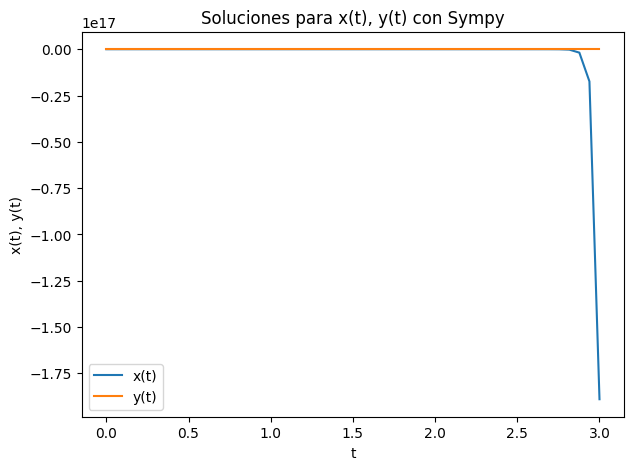

In [ ]:
# Gráfico
x_fun = lambda t: -5*np.exp(2*np.exp(t)-2)
y_fun = lambda t: -np.log(np.exp(2*np.exp(t)-2)) + 1

t_arr = np.linspace(0, 3)

plt.figure(figsize=(7,5))
plt.plot(t_arr, x_fun(t_arr), label="x(t)")
plt.plot(t_arr, y_fun(t_arr), label="y(t)")
plt.legend()

plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.title("Soluciones para x(t), y(t) con Sympy")

plt.savefig("Ex1aTraj.pdf")
plt.show()

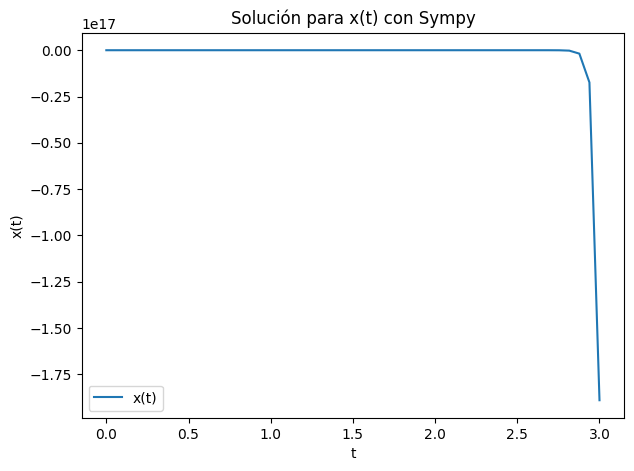

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(t_arr, x_fun(t_arr), label="x(t)")
plt.legend()

plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Solución para x(t) con Sympy")

plt.savefig("Ex1aTrajx.pdf")
plt.show()

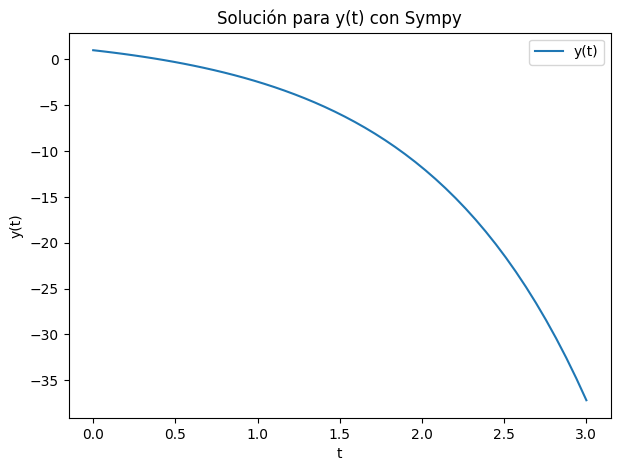

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(t_arr, y_fun(t_arr), label="y(t)")
plt.legend()

plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solución para y(t) con Sympy")

plt.savefig("Ex1aTrajy.pdf")
plt.show()

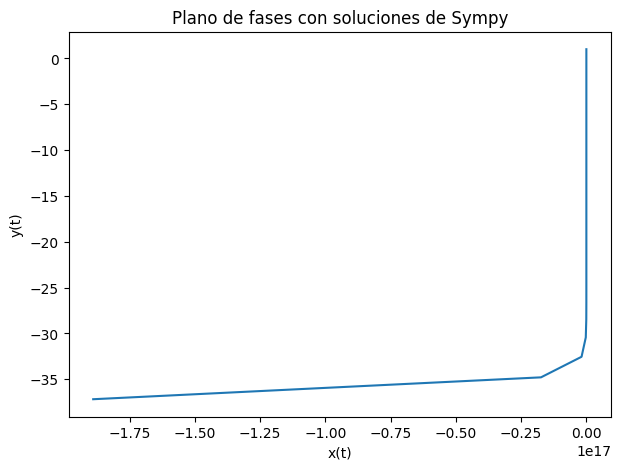

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(x_fun(t_arr), y_fun(t_arr))

plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("Plano de fases con soluciones de Sympy")

plt.savefig("Ex1aPhase.pdf")
plt.show()

Se deja también la opción de hacer lambdify a la expresión obtenida antes, pero hace que se indefina la solución para $y(t)$.

In [ ]:
# Gráfico
# x_fun = lambdify(t, eq1_ini.rhs, "numpy")
# y_fun = lambdify(t, eq2_ini.rhs, "numpy")

# t_arr = np.linspace(0, 3)

# plt.figure(figsize=(7,5))
# plt.plot(t_arr, x_fun(t_arr), label="x(t)")
# plt.plot(t_arr, y_fun(t_arr), label="y(t)")
# plt.legend()

# plt.xlabel("x(t), y(t)")
# plt.ylabel("t")
# plt.title("Soluciones para x(t), y(t) con Sympy")

# plt.savefig("Ex1aTrajLambd.pdf")
# plt.show()

In [ ]:
# Gráfico

# x_fun = lambdify(t, eq1_ini.rhs, "numpy")
# y_fun = lambdify(t, eq2_ini.rhs, "numpy")

# t_arr = np.linspace(0, 3)

# plt.figure(figsize=(7,5))
# plt.plot(x_fun(t_arr), y_fun(t_arr))

# plt.xlabel("x(t)")
# plt.ylabel("y(t)")
# plt.title("Plano de fases de x(t), y(t) con Sympy")

# plt.savefig("Ex1aPhase.pdf")
# plt.show()

### **Parte b)**

In [ ]:
from scipy.integrate import solve_ivp # Función para resolver EDO numéricamente

In [ ]:
# Se crea una función que represente
# el lado derecho de la EDO de manera vectorial
def f(t, X):
    x, y = X
    dx = 3*x - x*y
    dy = y + np.log(y)

    return [dx, dy]

In [ ]:
# Tiempo de simulación, condición inicial y tolerancia
t_span, X0, tol = (0, 3), (-5, 1), 1e-10

# Solución
sol = solve_ivp(f, t_span, X0, atol=tol, rtol=tol)

# Tiempo y trayectorias
t, x, y = sol["t"], *sol["y"]

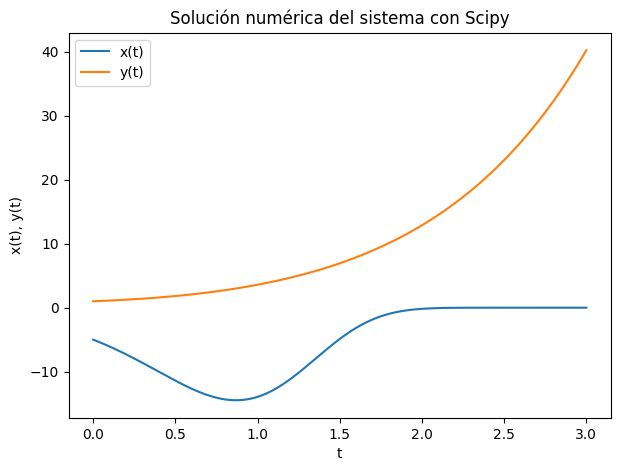

In [ ]:
# Gráfico
plt.figure(figsize=(7, 5))
plt.tight_layout()

plt.plot(t, x, label="x(t)")
plt.plot(t, y, label="y(t)")

plt.title("Solución numérica del sistema con Scipy")
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.legend()

plt.savefig("Ex1bTraj.pdf")
plt.show()

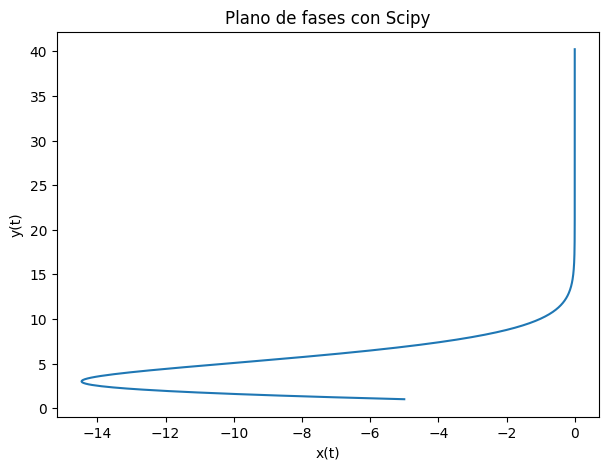

In [ ]:
# Gráfico
plt.figure(figsize=(7, 5))
plt.tight_layout()

plt.plot(x, y)

plt.title("Plano de fases con Scipy")
plt.xlabel("x(t)")
plt.ylabel("y(t)")

plt.savefig("Ex1bPhase.pdf")
plt.show()

## **Ejercicio 2**

In [ ]:
n = 3 # Dimensión del problema

A = np.array([
    [1, 2, 2],
    [-5, 3, 4],
    [0, 2, 0]
])

B = np.array([2,0,1])

def f(t, X, u):
    return A@X + B*u(t)

u1 = lambda t: 0
u2 = lambda t: 1
u3 = lambda t: -np.cos(t)
u4 = lambda t: t**2

u_arr = [u1, u2, u3, u4]
u_str = ["0", "1", "-\cos (t)", "t^2"]
t_span, X0, tol = (0, 1), np.zeros(n), 1e-11
sols = [solve_ivp(f, t_span, X0, atol=tol, rtol=tol, args=(u,)) for u in u_arr]
t_arr, X_arr = [sol["t"] for sol in sols], [sol["y"] for sol in sols]

In [ ]:
def plot_paths(i):
    t, X = t_arr[i], X_arr[i]

    marker = ["-", ">", "o"]

    plt.figure(figsize=(7, 5))
    if i==0:
        for j in range(n): plt.plot(t, X[j], marker[j],
                                    label=r"$x_{}(t)$".format(j+1));
    else:
        for j in range(n): plt.plot(t, X[j], label=r"$x_{}(t)$".format(j+1));

    plt.tight_layout()
    plt.xlabel("t")
    plt.ylabel(r"$x_1(t), x_2(t), x_3(t)$")
    plt.title(r"Trayectorias con $u_{}(t) = {}$".format(i+1, u_str[i]))
    plt.legend()
    plt.savefig("Ex2u{}.pdf".format(i+1))

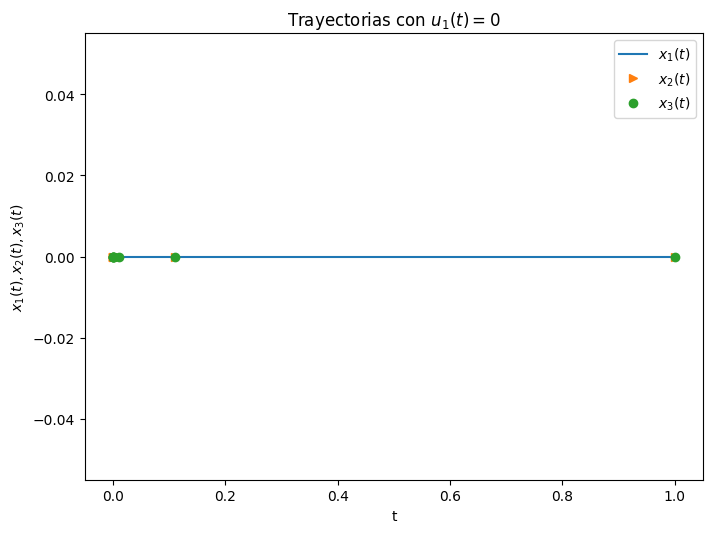

In [ ]:
plot_paths(0)

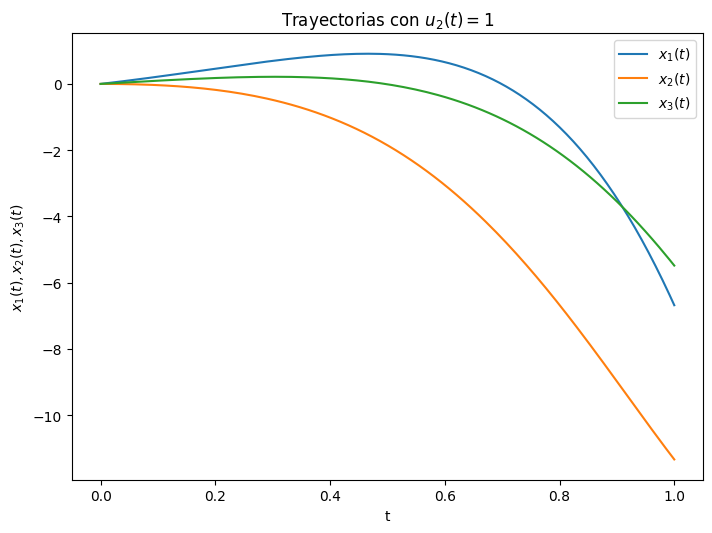

In [ ]:
plot_paths(1)

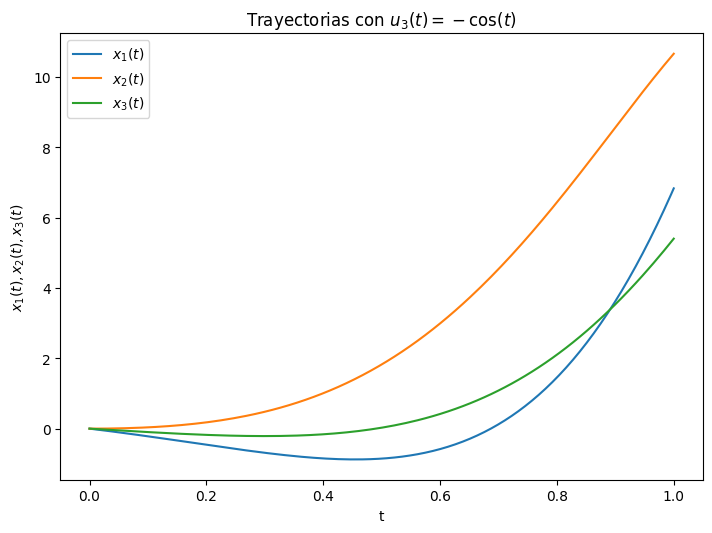

In [ ]:
plot_paths(2)

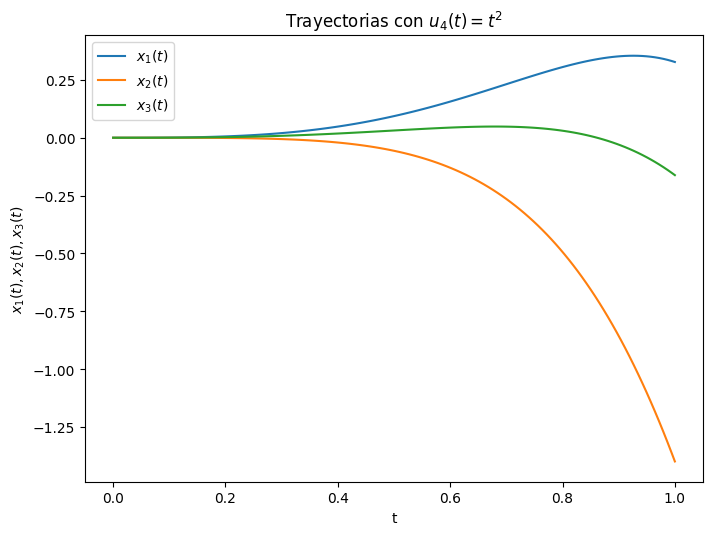

In [ ]:
plot_paths(3)

## **Ejercicio 3**

In [ ]:
from scipy.optimize import linprog # Módulo de programación lineal

In [ ]:
print(scipy.__version__)

1.10.1


In [ ]:
c = np.array([-3, 1, -11]) # Vector de costos

# Matriz de restricciones con igualdad
A_eq = np.array([
    [-1, 1, -7]
])

# Vector de restricciones con igualdad
b_eq = np.array([13])

# Matriz de restricciones con desigualdad <=
A_ub = np.array([
    [3, -1, 2],
    [2, 0, 4],
    [2, -4, 1]
])

# Vector de restricciones con desigualdad <=
b_ub = np.array([0, 3, 3])

# Cotas para las variables
bounds = [(0, None) for _ in range(3)]

# Métodos a probar
methods = ["highs", "highs-ds", "highs-ipm", "interior-point", "revised simplex", "simplex"]

# Resultado de la optimización para cada método
res = {methods[i]:linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,
                              bounds=bounds, method=methods[i]) for i in range(len(methods))}

for method in methods:
    print("Solución con {}".format(method))
    print("Valor óptimo: {}".format(res[method].fun))
    print("Óptimo: {}".format(res[method].x))
    print()

Solución con highs
Valor óptimo: 10.0
Óptimo: [ 1.5 14.5  0. ]

Solución con highs-ds
Valor óptimo: 10.0
Óptimo: [ 1.5 14.5  0. ]

Solución con highs-ipm
Valor óptimo: 10.0
Óptimo: [ 1.5 14.5  0. ]

Solución con interior-point
Valor óptimo: 10.000000000006905
Óptimo: [ 1.03000972 15.6749757   0.23499514]

Solución con revised simplex
Valor óptimo: 10.0
Óptimo: [ 0.   18.25  0.75]

Solución con simplex
Valor óptimo: 10.0
Óptimo: [ 1.5 14.5  0. ]



<ipython-input-117-938fe202198a>:28: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = {methods[i]:linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,
<ipython-input-117-938fe202198a>:28: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = {methods[i]:linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,
<ipython-input-117-938fe202198a>:28: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = {methods[i]:linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,


## **Ejercicio 4**

\begin{align}
\min_{x,y,z \geq 0} \quad & f(x, y, z) = -xyz \\
\text{s.a.} \quad & \begin{aligned}
    x + y + z &\leq 500 \\
    xy &\geq 3000 \\
\end{aligned}
\end{align}

In [ ]:
from scipy.optimize import minimize

In [ ]:
n = 3 # Dimensión del problema

f = lambda x: -x[0]*x[1]*x[2] # Función a minimizar

# Restricciones
cons = (
    {'type': 'ineq', 'fun': lambda x: -(x[0]+x[1]+x[2])+500},
    {'type': 'ineq', 'fun': lambda x: -3000+x[0]*x[1]}
)

# Punto de donde comenzar la optimización, este caso (1,1,1)
x0 = 100*np.ones(n)

# Cotas para las variables
bnds = ((0, None), (0, None), (0, None))

# Resultado de la minimización
res = minimize(f, x0, method='SLSQP',constraints=cons, bounds=bnds)

# x,y,z óptimos
x_opt, y_opt, z_opt = res.x

# Prints
print("Valor óptimo: {}".format(-res.fun))
print("Óptimo: {}".format(res.x))

Valor óptimo: 4630054.25730085
Óptimo: [166.65781854 166.65781854 166.69965254]


## **Ejercicio 5**

### **Preliminar: gráfico de las cónicas**

In [ ]:
# Función para la primera cónica
def f1(x, y):
    return (x-4)**2+3*y**2-20

# Función para la segunda cónica
def f2(x, y):
    return x+8*(y+1)**2-10

In [ ]:
# Arreglos espaciales
x = np.linspace(-6, 11, 400)
y = np.linspace(-4, 4, 400)
x, y = np.meshgrid(x, y)

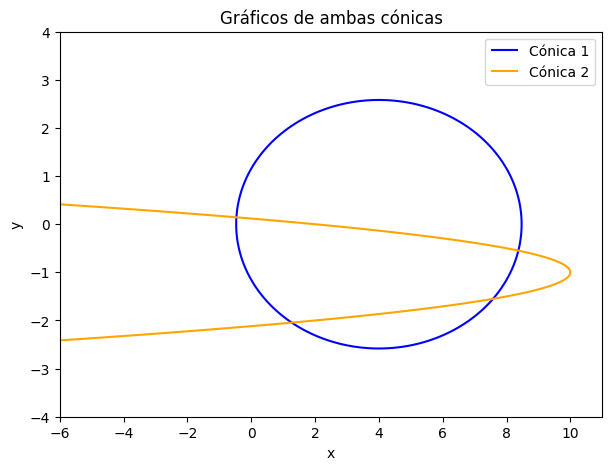

In [ ]:
# Gráfico
plt.figure(figsize=(7,5))
plt.tight_layout()
c1 = plt.contour(x, y, f1(x,y), [0], colors="blue")
c2 = plt.contour(x, y, f2(x,y), [0], colors="orange")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráficos de ambas cónicas")

h1, l1 = c1.legend_elements()
h2, l1 = c2.legend_elements()

plt.legend([h1[0], h2[0]], ['Cónica 1', 'Cónica 2'])
plt.savefig("Ex5NoInt.pdf")
plt.show()

### **Resolución con Scipy**

In [ ]:
from scipy.optimize import fsolve

In [ ]:
# Función a la que encontrar raíces
def f(x):
    f1 = (x[0]-4)**2+3*x[1]**2-20
    f2 = x[0]+8*(x[1]+1)**2-10
    return (f1, f2)

# Puntos iniciales para la optimización
x0_arr = np.array([
    [0, 3],
    [0, -3],
    [10, -3],
    [10, 3]
])

# Raíces encontradas para cada punto inicial
roots_sci = np.array([fsolve(f, x0) for x0 in x0_arr])

roots_sci

array([[-0.46520023,  0.14374387],
       [ 1.26910002, -2.04468297],
       [ 7.57608167, -1.55044508],
       [ 8.37001854, -0.54861582]])

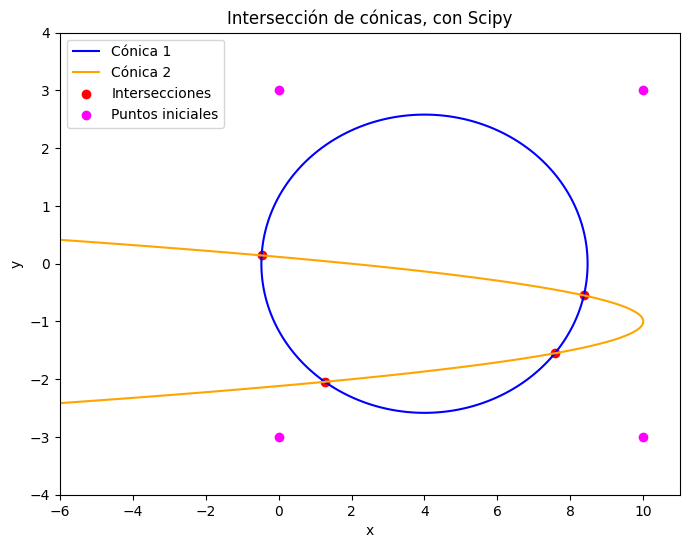

In [ ]:
# Gráfico
plt.figure(figsize=(8,6))
plt.tight_layout()
c1 = plt.contour(x, y, f1(x,y), [0], colors="blue")
c2 = plt.contour(x, y, f2(x,y), [0], colors="orange")
c3 = plt.scatter(roots_sci[:,0], roots_sci[:,1], c="red")
c4 = plt.scatter(x0_arr[:,0], x0_arr[:,1], c="magenta")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Intersección de cónicas, con Scipy")

h1, l1 = c1.legend_elements()
h2, l1 = c2.legend_elements()

plt.legend([h1[0], h2[0], c3, c4], ['Cónica 1',
                                    'Cónica 2',
                                    'Intersecciones',
                                    'Puntos iniciales'])
plt.savefig("Ex5IntScipy.pdf")
plt.show()

### **Resolución con Sympy**

In [ ]:
# Dependencias necesarias de Sympy
from sympy import solve, Poly, Eq, Matrix, Symbol, N, re
from sympy.abc import x as sym_x
from sympy.abc import y as sym_y

In [ ]:
# Resolución de ambas cónicas igualdas a cero
res = solve([(sym_x-4)**2+3*sym_y**2-20, sym_x+8*(sym_y+1)**2-10])

# Extracción de las raíces
roots_sym = np.zeros((len(res), 2))

for i in range(len(res)):
    roots_sym[i] = np.array([float(re(N(res[i][sym_x]))), float(re(N(res[i][sym_y])))])

roots_sym

array([[ 7.57608167, -1.55044508],
       [-0.46520023,  0.14374387],
       [ 1.26910002, -2.04468297],
       [ 8.37001854, -0.54861582]])

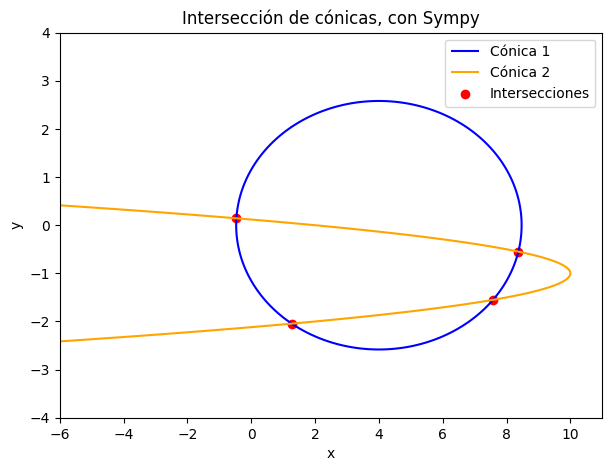

In [ ]:
plt.figure(figsize=(7,5))
plt.tight_layout()
c1 = plt.contour(x, y, f1(x,y), [0], colors="blue")
c2 = plt.contour(x, y, f2(x,y), [0], colors="orange")
c3 = plt.scatter(roots_sym[:,0], roots_sym[:,1], c="red")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Intersección de cónicas, con Sympy")

h1, l1 = c1.legend_elements()
h2, l1 = c2.legend_elements()

plt.legend([h1[0], h2[0], c3], ['Cónica 1', 'Cónica 2', 'Intersecciones'])
plt.savefig("Ex5IntSympy.pdf")
plt.show()

In [ ]:
for i in range(len(roots_sci)):
    min, min_j = np.inf, 0
    for j in range(len(roots_sym)):
        if np.linalg.norm(roots_sci[i]-roots_sym[j]) < min:
            min = np.linalg.norm(roots_sci[i]-roots_sym[j])
            min_j = j

    print("Raíz Scipy:          {}".format(roots_sci[i]))
    print("Raíz Sympy:          {}".format(roots_sym[min_j]))
    print("Diferencia absoluta: {}".format(np.abs(roots_sci[i]-roots_sym[min_j])))
    print()

Raíz Scipy:          [-0.46520023  0.14374387]
Raíz Sympy:          [-0.46520023  0.14374387]
Diferencia absoluta: [6.37268016e-14 1.15185639e-14]

Raíz Scipy:          [ 1.26910002 -2.04468297]
Raíz Sympy:          [ 1.26910002 -2.04468297]
Diferencia absoluta: [5.38724620e-12 3.95239397e-14]

Raíz Scipy:          [ 7.57608167 -1.55044508]
Raíz Sympy:          [ 7.57608167 -1.55044508]
Diferencia absoluta: [9.99040850e-11 4.03448386e-11]

Raíz Scipy:          [ 8.37001854 -0.54861582]
Raíz Sympy:          [ 8.37001854 -0.54861582]
Diferencia absoluta: [1.50990331e-13 1.03361764e-13]

